<a href="https://colab.research.google.com/github/SundharessB/machine-learing/blob/main/2348564_lab8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report
from imblearn.over_sampling import SMOTE  # Import SMOTE



In [3]:
df = pd.read_csv('/content/spam_or_not_spam.csv')

In [4]:
df

,email,label
0,date wed NUMBER aug NUMBER NUMBER NUMBER NUMB...,0
1,martin a posted tassos papadopoulos the greek ...,0
2,man threatens explosion in moscow thursday aug...,0
3,klez the virus that won t die already the most...,0
4,in adding cream to spaghetti carbonara which ...,0
...,...,...
3599,abc s good morning america ranks it the NUMBE...,1
3600,hyperlink hyperlink hyperlink let mortgage le...,1
3601,thank you for shopping with us gifts for all ...,1
3602,the famous ebay marketing e course learn to s...,1


In [8]:
df.isnull().sum()

email    1
label    0
dtype: int64

##**Data preprocessing**##

In [9]:
df.dropna(inplace=True)


In [10]:
df.isnull().sum()

email    0
label    0
dtype: int64

##**Data Overview Graph**##

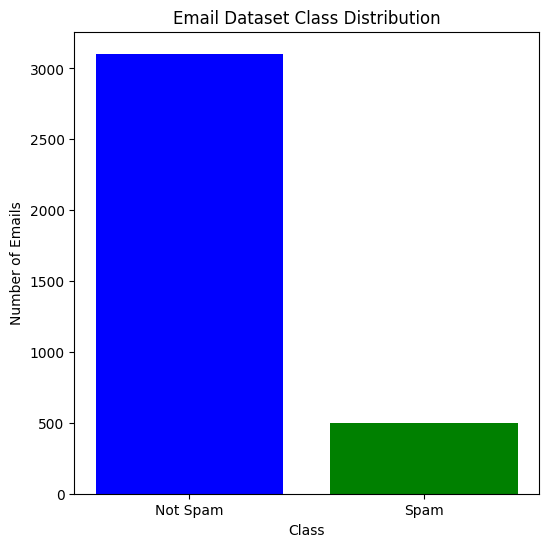

In [7]:
# Calculate the class distribution
class_distribution = df['label'].value_counts()

# Plot a bar chart
plt.figure(figsize=(6, 6))
plt.bar(class_distribution.index, class_distribution.values, color=['blue', 'green'])
plt.xlabel('Class')
plt.ylabel('Number of Emails')
plt.xticks(class_distribution.index, ['Not Spam', 'Spam'])
plt.title('Email Dataset Class Distribution')
plt.show()


##**Preprocess the text data**##

In [11]:
def preprocess_text(text):
    # Convert to lowercase and remove special characters
    text = text.lower().replace('\n', ' ').replace('\t', ' ').replace('\r', '')
    text = ''.join([c for c in text if c.isalpha() or c.isspace()])
    return text

df['email'] = df['email'].apply(preprocess_text)


In [12]:
df['email'] = df['email'].apply(preprocess_text)


##**Split the data into training and testing sets**##

In [15]:
X = df['email']
y = df['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


##**Vectorize the text using CountVectorizer**##

In [17]:
vectorizer = CountVectorizer()
X_train_vectorized = vectorizer.fit_transform(X_train)
X_test_vectorized = vectorizer.transform(X_test)

##**Train the Naive Bayes classifier**##

In [19]:
naive_bayes = MultinomialNB(alpha=1.0)  # Laplace smoothing (alpha=1.0)
naive_bayes.fit(X_train_vectorized, y_train)



MultinomialNB()

In [20]:
# Predict on the test set
y_pred = naive_bayes.predict(X_test_vectorized)


##**Evaluate the model before sampling**##

In [21]:
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)
print('Classification Report:\n', classification_report(y_test, y_pred))


Accuracy: 0.9902912621359223
Classification Report:
               precision    recall  f1-score   support

           0       0.99      1.00      0.99       627
           1       1.00      0.93      0.96        94

    accuracy                           0.99       721
   macro avg       0.99      0.96      0.98       721
weighted avg       0.99      0.99      0.99       721



##**using resampling method of oversampling the minority class using SMOTE (Synthetic Minority Oversampling Technique)**##

In [22]:
# Apply SMOTE to oversample the minority class (spam)
smote = SMOTE(random_state=42)
X_train_oversampled, y_train_oversampled = smote.fit_resample(X_train_vectorized, y_train)

# Calculate the class distribution after oversampling
class_distribution_oversampled = pd.Series(y_train_oversampled).value_counts()
print(class_distribution_oversampled)

1    2477
0    2477
Name: label, dtype: int64


##**Plot a bar chart for the oversampled data**##


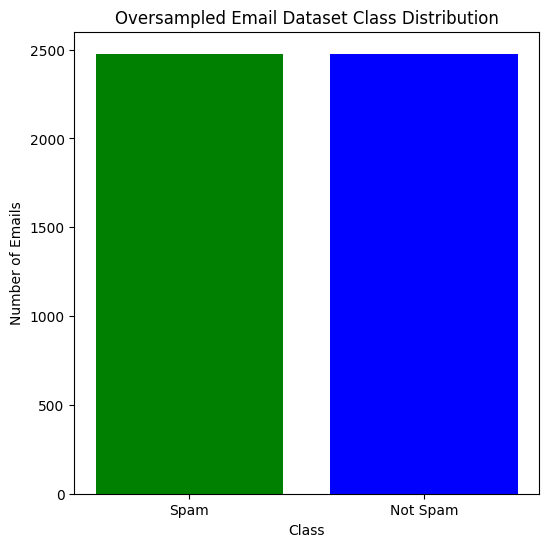

In [23]:
# Plot a bar chart for the oversampled data
plt.figure(figsize=(6, 6))
plt.bar(class_distribution_oversampled.index, class_distribution_oversampled.values, color=['blue', 'green'])
plt.xlabel('Class')
plt.ylabel('Number of Emails')
plt.xticks(class_distribution_oversampled.index, ['Not Spam', 'Spam'])
plt.title('Oversampled Email Dataset Class Distribution')
plt.show()


##**Train the Naive Bayes classifier on the oversampled data**##

In [24]:
naive_bayes_oversampled = MultinomialNB(alpha=1.0)  # Laplace smoothing (alpha=1.0)
naive_bayes_oversampled.fit(X_train_oversampled, y_train_oversampled)



MultinomialNB()

In [26]:
# Predict on the original test set
X_test_vectorized = vectorizer.transform(X_test)
y_pred_oversampled = naive_bayes_oversampled.predict(X_test_vectorized)

##**Evaluate the model trained on oversampled data**##


In [27]:
accuracy_oversampled = accuracy_score(y_test, y_pred_oversampled)
print('Accuracy (after oversampling):', accuracy_oversampled)
print('Classification Report (after oversampling):\n', classification_report(y_test, y_pred_oversampled))


Accuracy (after oversampling): 0.984743411927878
Classification Report (after oversampling):
               precision    recall  f1-score   support

           0       0.98      1.00      0.99       627
           1       0.99      0.89      0.94        94

    accuracy                           0.98       721
   macro avg       0.99      0.95      0.96       721
weighted avg       0.98      0.98      0.98       721



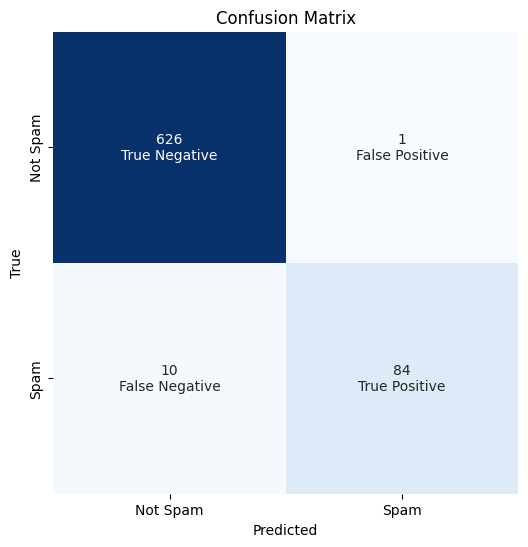

In [30]:
conf_matrix = confusion_matrix(y_test, y_pred_oversampled)

# Labels for annotating cells
labels = [['True Negative', 'False Positive'], ['False Negative', 'True Positive']]
labels = [[f'{v1}\n{v2}' for v1, v2 in zip(row, labels_row)] for row, labels_row in zip(conf_matrix, labels)]

# Create a heatmap with annotations
plt.figure(figsize=(6, 6))
sns.heatmap(conf_matrix, annot=labels, fmt='', cmap='Blues',
            xticklabels=['Not Spam', 'Spam'], yticklabels=['Not Spam', 'Spam'], cbar=False)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

##**ROC curve to visualize the trade-off between the models true positive rate (sensitivity) and false positive rate (1-specificity) atdifferent classification thresholds.**##

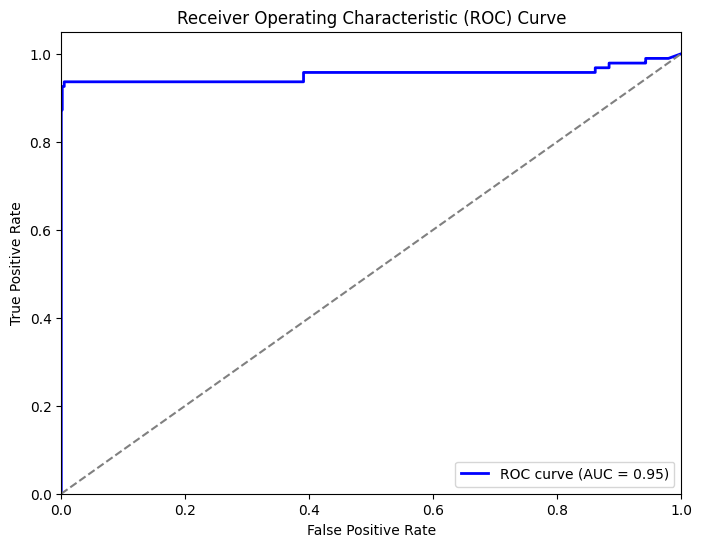

In [31]:
from sklearn.metrics import roc_curve, roc_auc_score

# Calculate the predicted probabilities for the positive class (spam)
y_prob = naive_bayes_oversampled.predict_proba(X_test_vectorized)[:, 1]

# Calculate the false positive rate, true positive rate, and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

# Calculate the Area Under the Curve (AUC)
roc_auc = roc_auc_score(y_test, y_prob)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

Here are some specific inferences that can be made about the ROC curve in the figure:

1. The classifier is very good at distinguishing between positive and negative cases, with an AUC of 0.95.

2. The classifier has a high sensitivity and specificity, even at low classification thresholds.

3. The classifier is likely to be useful for a variety of tasks, such as fraud detection, medical diagnosis, and anomaly detection

4. ROC curve is close to the top left corner, which indicates a high TPR and a low FPR at most thresholds

5. diagonal line, which indicates that our classifier is better than a random classifier.




##**a precision-recall curve to assess the model precision and recall at various decision thresholds.**##

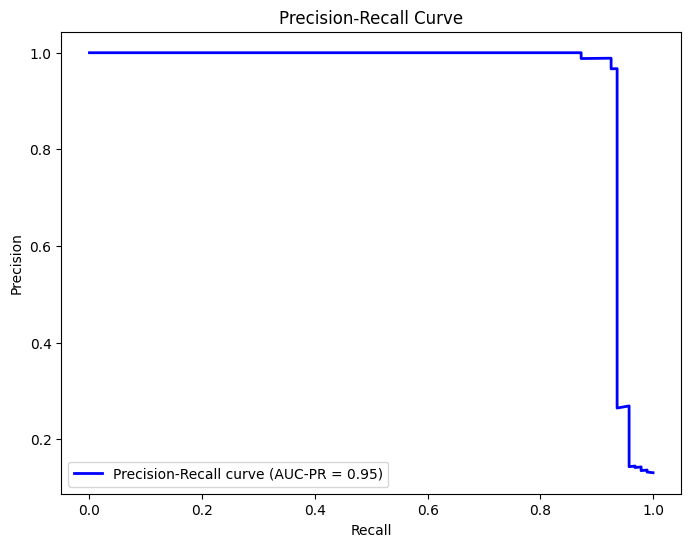

In [32]:
from sklearn.metrics import precision_recall_curve, average_precision_score

# Calculate the precision, recall, and thresholds
precision, recall, thresholds = precision_recall_curve(y_test, y_prob)

# Calculate the area under the precision-recall curve (AUC-PR)
average_precision = average_precision_score(y_test, y_prob)

# Plot the precision-recall curve
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='blue', lw=2, label=f'Precision-Recall curve (AUC-PR = {average_precision:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='best')
plt.show()

1. The classifier has a very high performance and can distinguish between the two classes very well.
2. we can see from the image that your precision-recall curve is close to the top right corner, which indicates a high precision and a high recall at most thresholds.
3. we can also see that your precision-recall curve has a sharp drop at the end, which indicates that your classifier has a low precision and a low recall at very low thresholds.



### **Feature Importance**

In [36]:
# Assuming the Naive Bayes model has been trained and named 'naive_bayes_oversampled'
# Also assuming 'vectorizer' is the CountVectorizer object

# Get the feature (word) names
feature_names = vectorizer.get_feature_names_out()

# Get the log probabilities for each feature for the spam and non-spam classes
log_prob_spam = naive_bayes_oversampled.feature_log_prob_[1]  # Spam class
log_prob_non_spam = naive_bayes_oversampled.feature_log_prob_[0]  # Non-spam class

# Calculate the difference in log probabilities to measure feature importance
feature_importance = log_prob_spam - log_prob_non_spam
N = 10  # Adjust this value as needed

# Get the indices of the top N important features
top_n_indices = feature_importance.argsort()[-N:][::-1]

# Get the top N important features and their scores
top_n_features = [feature_names[i] for i in top_n_indices]
top_n_scores = feature_importance[top_n_indices]


We calculate the log probabilities of each word for both spam and non-spam classes.
We compute the difference in log probabilities to measure feature importance.
We select the top N features based on their importance scores and visualize them in a horizontal bar chart

### **Feature Importance Graph**

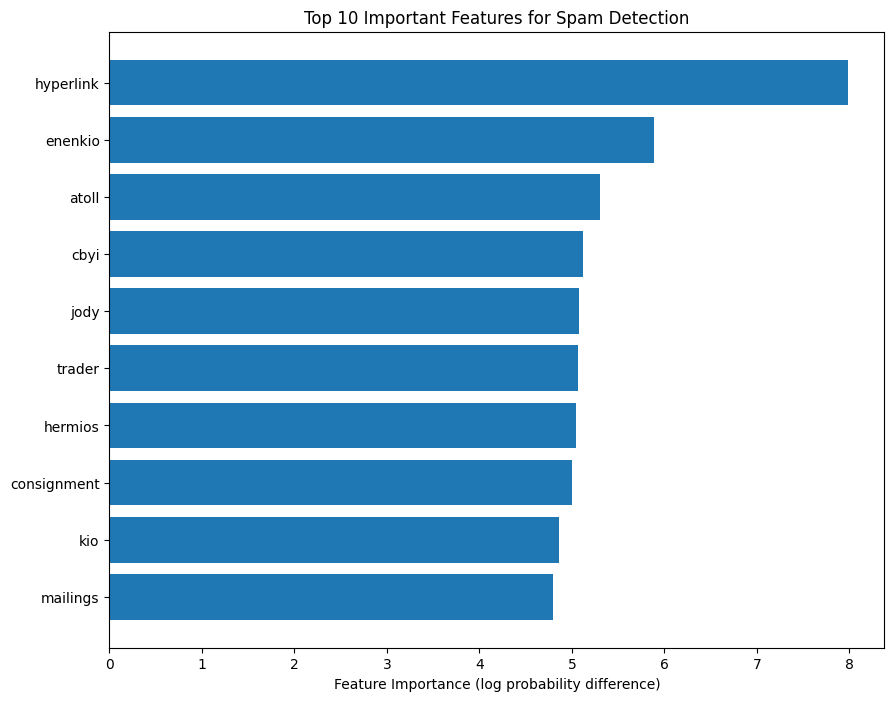

In [37]:
plt.figure(figsize=(10, 8))
plt.barh(range(N), top_n_scores, align='center')
plt.yticks(range(N), top_n_features)
plt.xlabel('Feature Importance (log probability difference)')
plt.title(f'Top {N} Important Features for Spam Detection')
plt.gca().invert_yaxis()  # Invert y-axis for better visualization
plt.show()


### **visualize key model evaluation metrics such as accuracy, precision, recall, F1-score, and AUC-ROC**

accuracy_score 0.984743411927878
precision_score 0.9882352941176471
recall_score 0.8936170212765957
f1_score 0.9385474860335196
roc_auc_score 0.9460110624724286


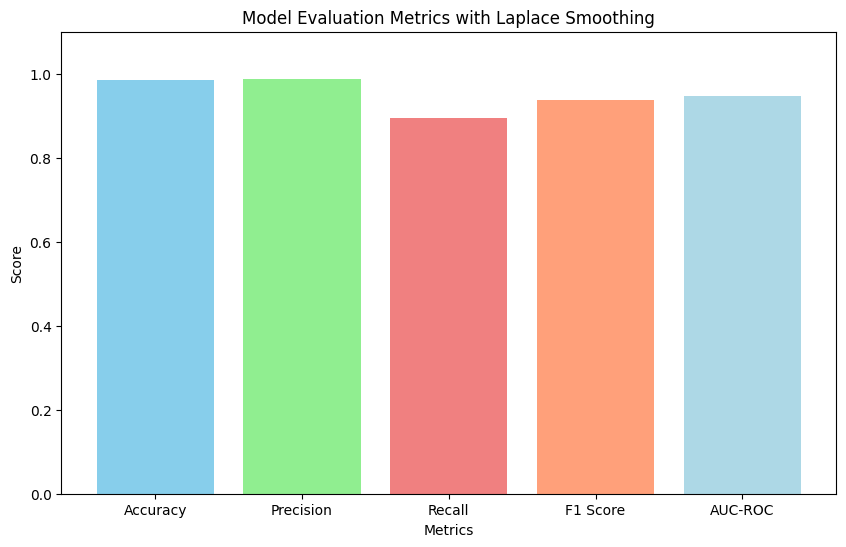

In [41]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred_oversampled)
precision = precision_score(y_test, y_pred_oversampled)
recall = recall_score(y_test, y_pred_oversampled)
f1 = f1_score(y_test, y_pred_oversampled)
roc_auc = roc_auc_score(y_test, y_pred_oversampled)

print("accuracy_score",accuracy)
print("precision_score",precision)
print("recall_score",recall)
print("f1_score",f1)
print("roc_auc_score",roc_auc)



# Create a multi-bar chart
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score', 'AUC-ROC']
values = [accuracy, precision, recall, f1, roc_auc]

plt.figure(figsize=(10, 6))
plt.bar(metrics, values, color=['skyblue', 'lightgreen', 'lightcoral', 'lightsalmon', 'lightblue'])
plt.xlabel('Metrics')
plt.ylabel('Score')
plt.title('Model Evaluation Metrics with Laplace Smoothing')
plt.ylim([0, 1.1])
plt.show()

### **Threshold Selection Graph**

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


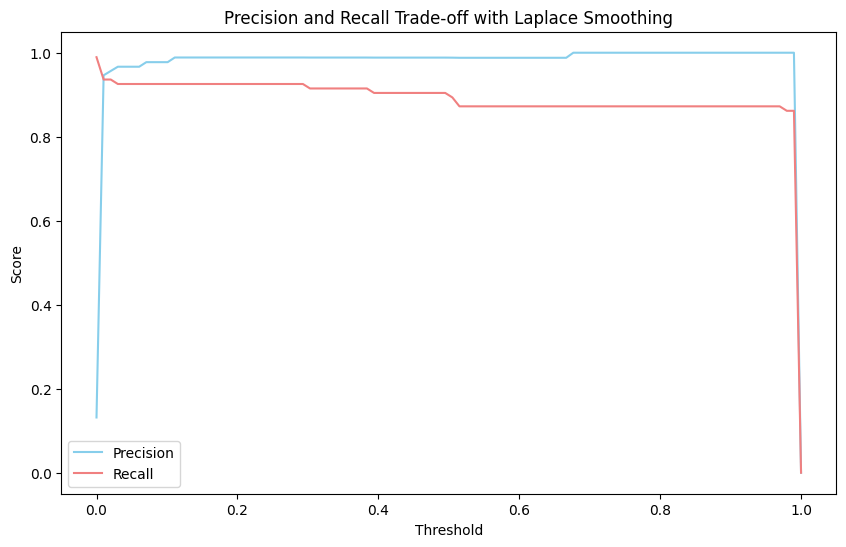

In [42]:
import numpy as np

# Generate an array of threshold values
thresholds = np.linspace(0, 1, 100)

# Initialize arrays to store precision and recall values for each threshold
precision_values = []
recall_values = []

# Calculate precision and recall for each threshold
for threshold in thresholds:
    y_pred_thresholded = (y_prob > threshold).astype(int)
    precision = precision_score(y_test, y_pred_thresholded)
    recall = recall_score(y_test, y_pred_thresholded)
    precision_values.append(precision)
    recall_values.append(recall)

# Plot the trade-off between precision and recall at different thresholds
plt.figure(figsize=(10, 6))
plt.plot(thresholds, precision_values, label='Precision', color='skyblue')
plt.plot(thresholds, recall_values, label='Recall', color='lightcoral')
plt.xlabel('Threshold')
plt.ylabel('Score')
plt.title('Precision and Recall Trade-off with Laplace Smoothing')
plt.legend()
plt.show()
